# Display data & Save normalized values to csv




In [ ]:
##import some libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



In [ ]:
## Load bio informations (./csv/basicinfo.csv)
d0 = pd.read_csv("/content/drive/My Drive/neobrain_radiomics/csv/basicinfo.csv")
d0[:3]


In [ ]:
## Load Feature values (./csv/pyradiomics_v4_T1_edit_results.csv)

d1 = pd.read_csv("/content/drive/My Drive/neobrain_radiomics/csv/T1.csv")
d1[:3]


In [ ]:
## Replace the patient id to number

dd = d1

patient_id = []

for i in range(len(d0)+1):
    if i<=9:
        patient_id.append('g0000'+str(i))
    else:
        patient_id.append('g000'+str(i)) 
    dd['Patient ID'] = dd['Patient ID'].replace(patient_id[i],i)

dd.rename(columns={'Patient ID':'Number'}, inplace=True)
dd

In [ ]:
## Merge two datas on 'Number'

d=pd.merge(d0,dd,on='Number' ,how = 'left')
d[:3]

Mot_6m_PDIb


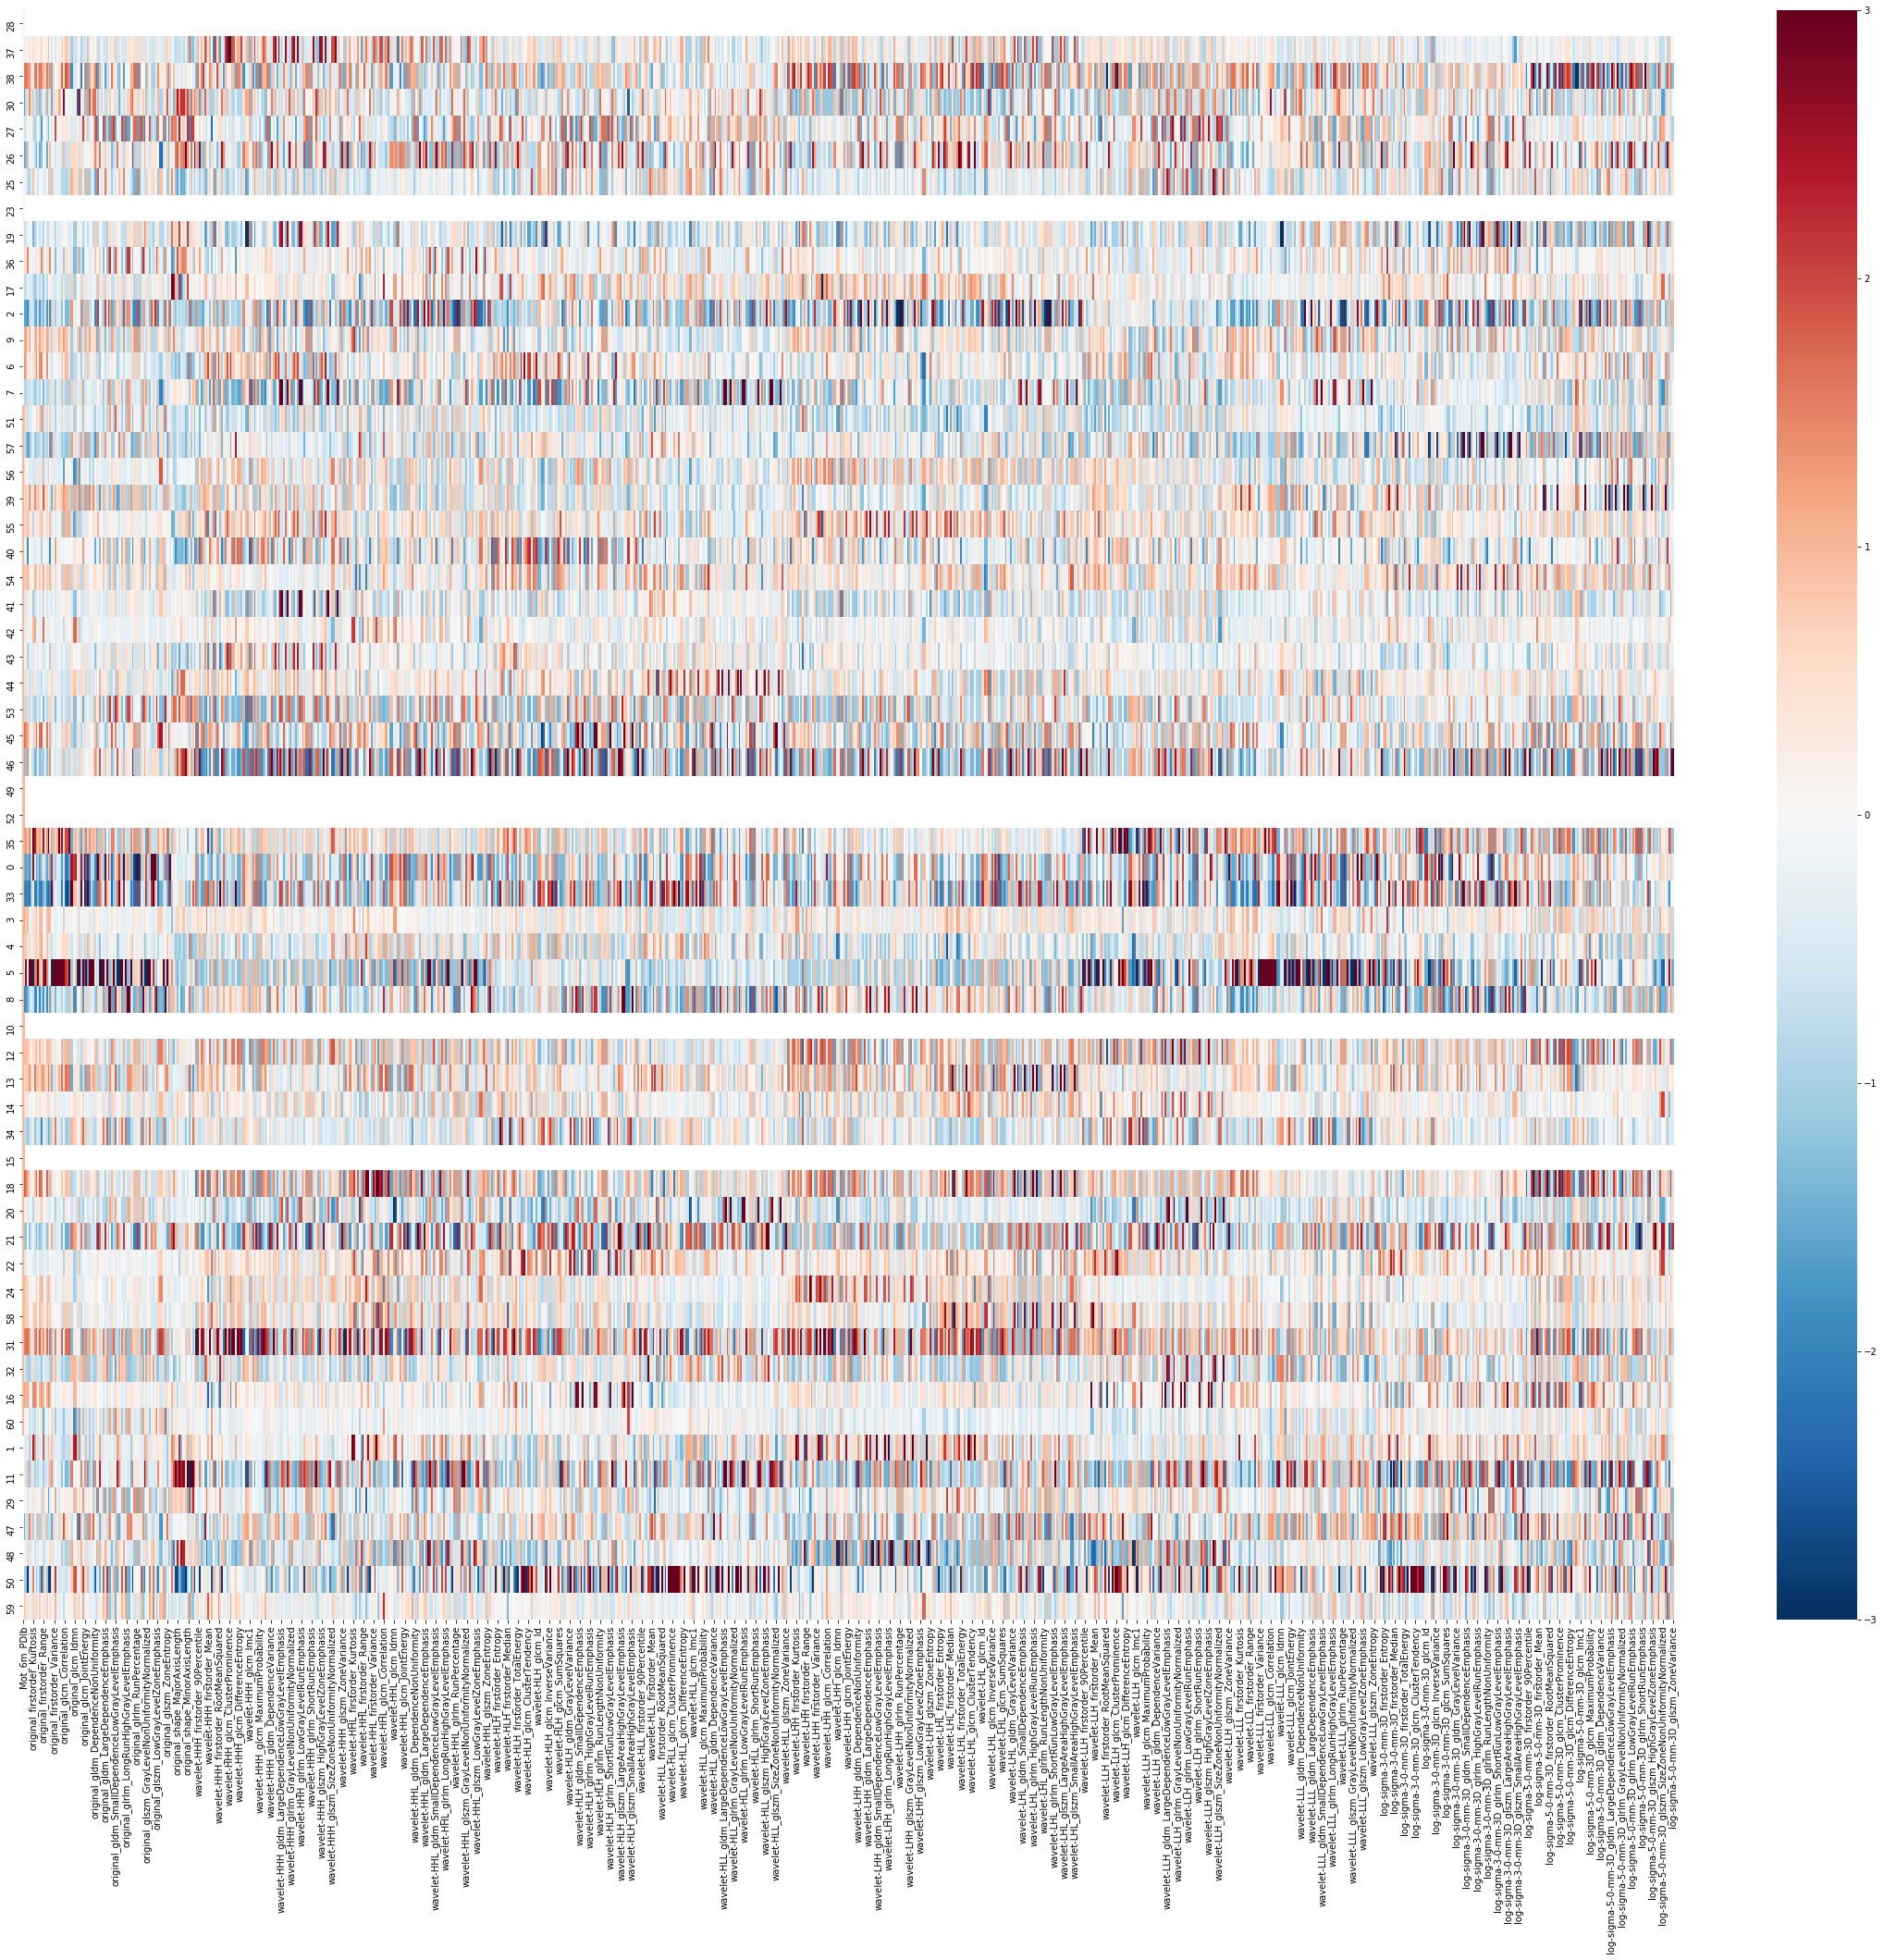

In [ ]:
## Heatmap with Binary PDI

cols=list(d.columns)
cols=cols[12:]
dz=d[cols]
dz = (dz-dz.mean())/dz.std()
clist = list(d.columns)
print(clist[11])

dz_pdi=pd.concat([d[clist[11]],dz],axis=1,sort=False) # Merging dataframes left/right

dz_pdi_sort = dz_pdi.sort_values(by=['Mot_6m_PDIb'],axis=0) # Sort values by Mot_6m_PDIb 
fig, ax = plt.subplots(figsize=(40,32))         # Sample figsize in inches
sns.heatmap(dz_pdi_sort, vmin=-3, vmax=3,cmap=plt.cm.get_cmap('RdBu_r'))
plt.show()


In [ ]:
## Remove rows that has any NAN

dzz=pd.concat([d[clist[0]],dz_pdi],axis=1,sort=False)
moddna = dzz.dropna()

print(moddna)



In [ ]:
## Drop patient number 6 & 36
## Sort on binary PDI values

ddd = moddna.drop([moddna.index[4] , moddna.index[28]])
d4 = ddd.sort_values(by=['Mot_6m_PDIb'],axis=0)
d4

In [ ]:
## Save results to CSV (./csv)

import csv

d4.to_csv('/content/drive/My Drive/neobrain_radiomics/csv/T1_.csv',index=False, header = True)

with open('/content/drive/My Drive/neobrain_radiomics/csv/T1_.csv') as in_file:
    with open('/content/drive/My Drive/neobrain_radiomics/csv/pyradiomics_v4_T1_norm_results.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        for row in csv.reader(in_file):
            if any(row):
                writer.writerow(row)

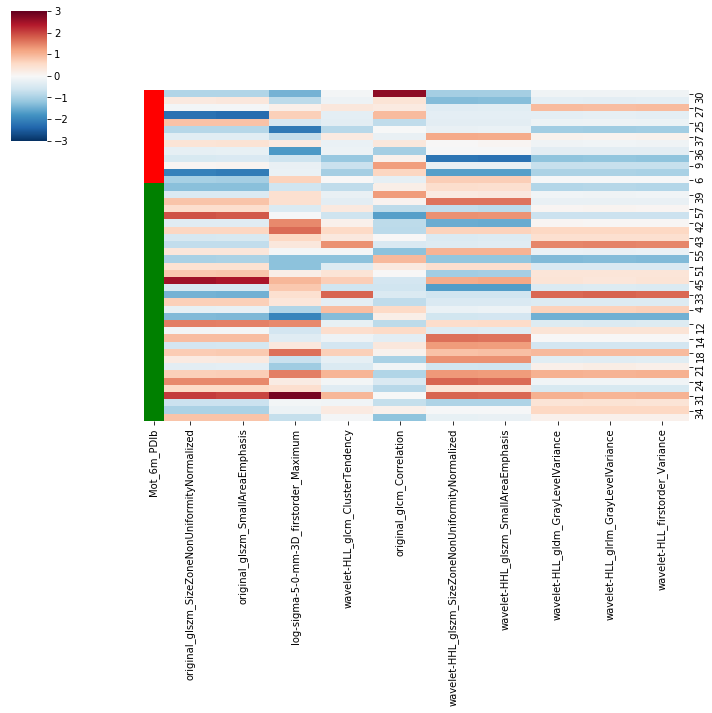

In [ ]:
## Show most significant 10 features 
lut=dict(zip(d4.iloc[:,1].unique(),"rgb"))
row_colors = d4.iloc[:,1].map(lut)
sns.clustermap(d4.iloc[:,[81,82,882,381,25,267,268,405,416,377]],vmin = -3,vmax=3,row_colors = row_colors, row_cluster = False, col_cluster= False, cmap = plt.cm.get_cmap('RdBu_r'))
#Ylabel --> index[o] patient#[x]